In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.figsize'] = (20, 5)

In [2]:
def get_rms(data, n):
    new = np.zeros(data.shape)
    for channel in range(data.shape[1]):
        for current in range(data.shape[0]):
            suma = 0
            for window in range(current, current - n, -1):
                suma += data[window, channel] * data[window, channel]
            new[current, channel] = (np.sqrt((1/n)*suma) / 128) if channel != 8 else data[current, channel]
    #plt.figure()
    #plt.plot(data)
    #plt.figure()
    #plt.plot(new)
    return new

def peel_labels(data):
    return data[:,:8], data[:,8]

def get_values(seshes, skip_hibernation):
    big_matrix = np.zeros((0, 9))
    for sesh in seshes:
        for gesture in range(8):
            wei = sesh + "/" + str(gesture) + ".txt"
            print(wei)
            matrix = np.genfromtxt(wei, delimiter=",")
            rms = get_rms(matrix, 80)
            #plt.figure()
            #plt.plot(rms)
            if skip_hibernation:
                rms = rms[rms[:,8] != 0]
                rms[:,8] -= 1
            #plt.figure()
            #plt.plot(rms)
            big_matrix = np.concatenate((big_matrix, rms), axis = 0)
    return big_matrix

In [3]:
#gotta go fast
skip_hibernation = True
readings = "../myo-readings-dataset/_readings/"
seshes = [x[0] for x in os.walk(readings)][1:]
print(*seshes, sep = "\n")
print("kekw")

start = 37

train_set, valid_set, test_set = get_values([seshes[start]], skip_hibernation), \
                                 get_values([seshes[start + 1]], skip_hibernation), \
                                 get_values([seshes[start + 2]], skip_hibernation)

train, train_labels = peel_labels(train_set)
valid, valid_labels = peel_labels(valid_set)
test, test_labels = peel_labels(test_set)

../myo-readings-dataset/_readings/03
../myo-readings-dataset/_readings/AM-S1
../myo-readings-dataset/_readings/AM-S2
../myo-readings-dataset/_readings/AM-S3
../myo-readings-dataset/_readings/Meritve seja 1
../myo-readings-dataset/_readings/Meritve seja 2
../myo-readings-dataset/_readings/Meritve seja 3
../myo-readings-dataset/_readings/Meritve-seja-1
../myo-readings-dataset/_readings/Meritve-seja-2
../myo-readings-dataset/_readings/Meritve-seja-3
../myo-readings-dataset/_readings/mi-seja1
../myo-readings-dataset/_readings/mi-seja2
../myo-readings-dataset/_readings/mi-seja3
../myo-readings-dataset/_readings/myo_session1
../myo-readings-dataset/_readings/myo_session2
../myo-readings-dataset/_readings/myo_session3
../myo-readings-dataset/_readings/record_1
../myo-readings-dataset/_readings/record_2
../myo-readings-dataset/_readings/record_3
../myo-readings-dataset/_readings/s1
../myo-readings-dataset/_readings/s2
../myo-readings-dataset/_readings/s3
../myo-readings-dataset/_readings/Seja 

In [4]:
'''
#all sessions
skip_hibernation = False
readings = "../myo-readings-dataset/_readings/"
seshes = list(os.walk(readings))[1:]
np.random.shuffle(seshes)
siz = len(seshes)
split1 = int(0.6 * siz)
split2 = int(0.8 * siz)
train_set, valid_set, test_set = get_values(seshes[:split1], skip_hibernation), \
                                 get_values(seshes[split1:split2], skip_hibernation), \
                                 get_values(seshes[split2:], skip_hibernation)

train, train_labels = peel_labels(train_set)
valid, valid_labels = peel_labels(valid_set)
test, test_labels = peel_labels(test_set)
'''

'\n#all sessions\nskip_hibernation = False\nreadings = "../myo-readings-dataset/_readings/"\nseshes = list(os.walk(readings))[1:]\nnp.random.shuffle(seshes)\nsiz = len(seshes)\nsplit1 = int(0.6 * siz)\nsplit2 = int(0.8 * siz)\ntrain_set, valid_set, test_set = get_values(seshes[:split1], skip_hibernation),                                  get_values(seshes[split1:split2], skip_hibernation),                                  get_values(seshes[split2:], skip_hibernation)\n\ntrain, train_labels = peel_labels(train_set)\nvalid, valid_labels = peel_labels(valid_set)\ntest, test_labels = peel_labels(test_set)\n'

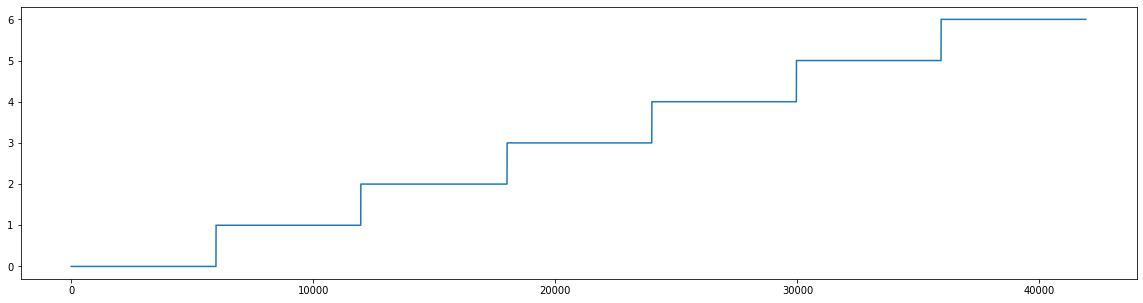

In [5]:
plt.figure()
plt.plot(test_labels)

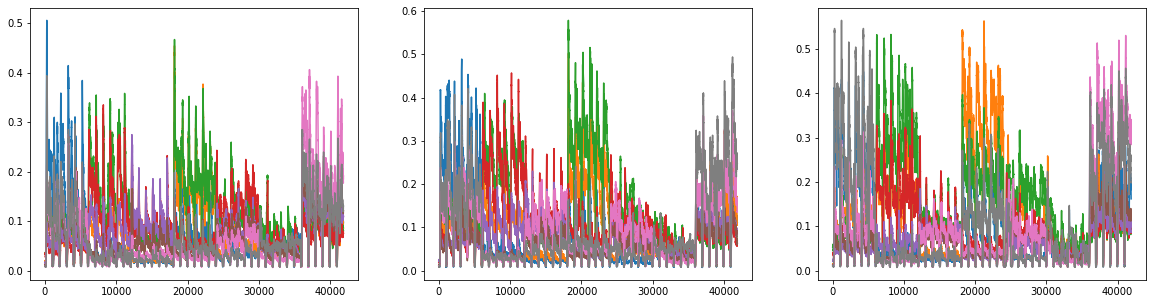

In [6]:
fig, ax = plt.subplots(1, 3)
ax[0].plot(train)
ax[1].plot(valid)
ax[2].plot(test)

In [7]:
model = keras.Sequential([
    keras.layers.Dense(200, activation = "relu", input_shape = (8,)),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(70, activation = "relu"),
    keras.layers.Dense(7 if skip_hibernation else 8, activation = "sigmoid")
])

opt = keras.optimizers.Adam(learning_rate = 0.001)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer = opt, loss = loss, metrics = ["accuracy"])

In [8]:
history = model.fit(train, train_labels, validation_data = (valid, valid_labels), epochs=5)

Epoch 1/5
1308/1308 [==============================] - 3s 2ms/step - loss: 0.7425 - accuracy: 0.7974 - val_loss: 1.2217 - val_accuracy: 0.7376
Epoch 2/5
1308/1308 [==============================] - 2s 1ms/step - loss: 0.2846 - accuracy: 0.8853 - val_loss: 1.3464 - val_accuracy: 0.7657
Epoch 3/5
1308/1308 [==============================] - 2s 1ms/step - loss: 0.2390 - accuracy: 0.9017 - val_loss: 1.6454 - val_accuracy: 0.7721
Epoch 4/5
1308/1308 [==============================] - 2s 1ms/step - loss: 0.2099 - accuracy: 0.9147 - val_loss: 2.1389 - val_accuracy: 0.7737
Epoch 5/5
1308/1308 [==============================] - 2s 1ms/step - loss: 0.1883 - accuracy: 0.9254 - val_loss: 1.8117 - val_accuracy: 0.7835


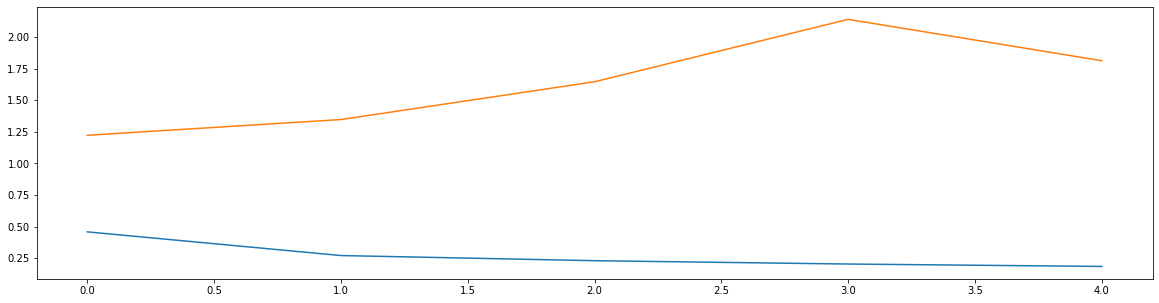

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

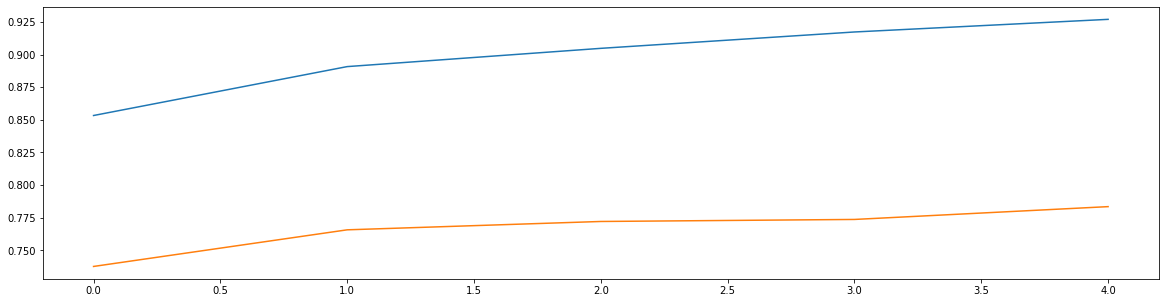

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [11]:
model.evaluate(test, test_labels)

1310/1310 [==============================] - 1s 528us/step - loss: 3.8855 - accuracy: 0.5872


[3.8855464458465576, 0.5872459411621094]

In [12]:
predictions = model.predict(test)

In [13]:
predicted_labels = np.argmax(predictions, axis=1)
conf = confusion_matrix(test_labels, predicted_labels)
conf

array([[4916,  217,  244,    0,   33,  567,    0],
       [  33, 4632,  159, 1039,   75,   43,    0],
       [   0,  508,   73,    0, 5409,   53,    1],
       [  44,  591,    0, 5324,   17,    5,    0],
       [ 539,  729,    0,  654, 3777,  274,    0],
       [   2, 2058,   70,  109, 1271, 2441,   26],
       [4717,  438,   23,    1,   68,   66,  670]], dtype=int64)

In [14]:
if skip_hibernation:
    legend = ["flexion", "extension", "radial deviation", "ulnar deviation", "pronation", "supination", "fist"]
else:
    legend = ["hibernation", "flexion", "extension", "radial deviation", "ulnar deviation", "pronation", "supination", "fist"]

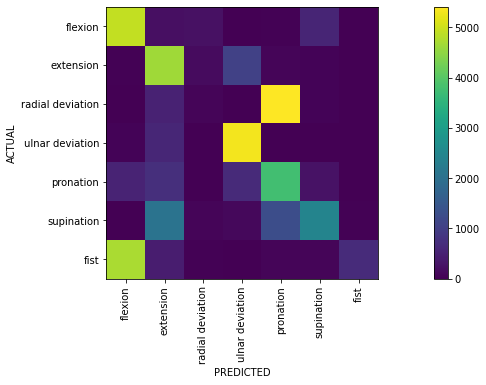

In [15]:
plt.imshow(conf)
plt.ylabel("ACTUAL")
plt.xlabel("PREDICTED")
plt.yticks(np.arange(len(legend)), legend)
plt.xticks(np.arange(len(legend)), legend, rotation='vertical')
plt.colorbar()

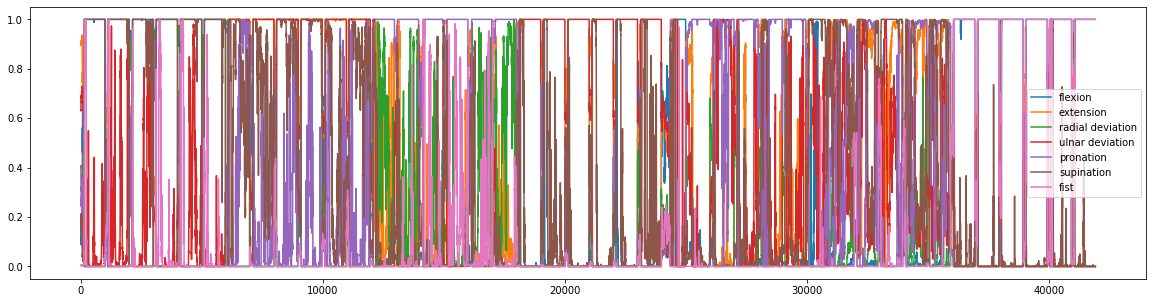

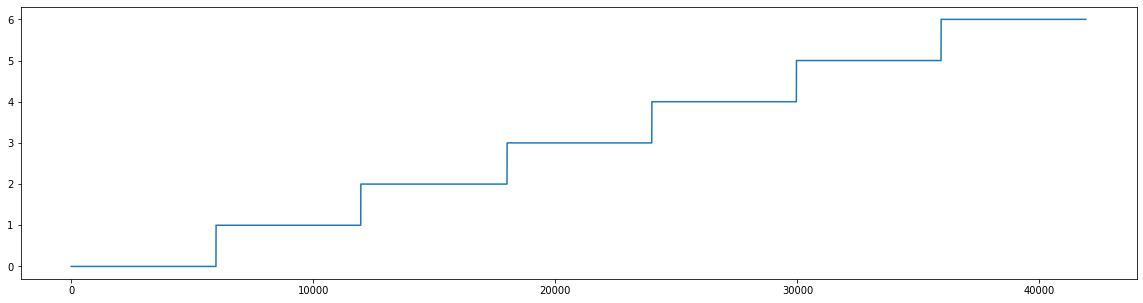

In [16]:
plt.figure()
plt.plot(predictions)
plt.legend(legend)
plt.figure()
plt.plot(test_labels)

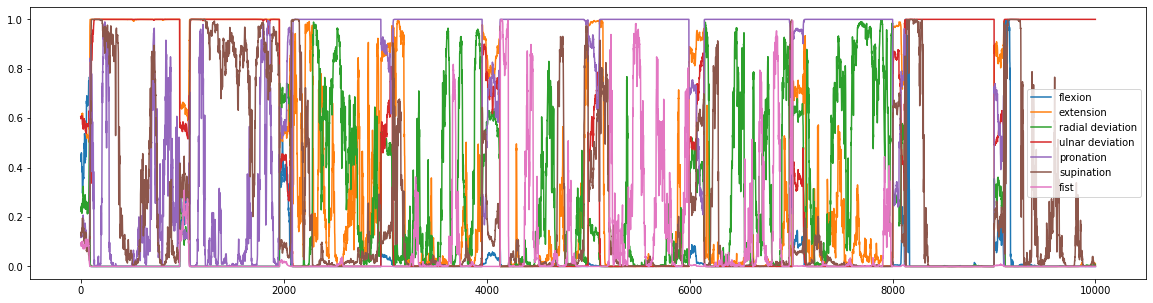

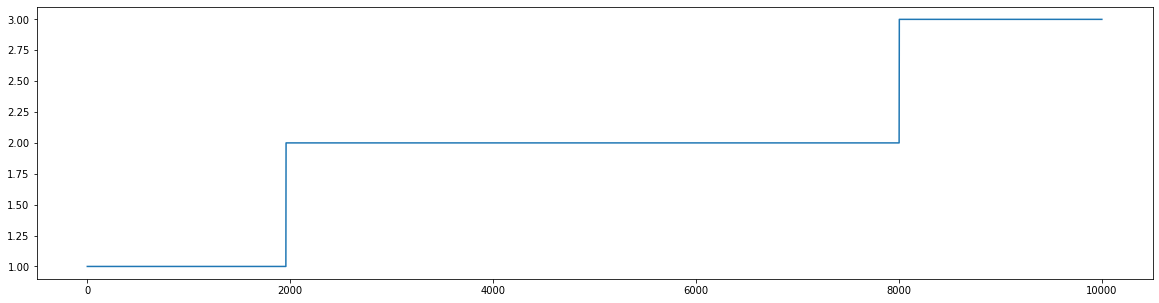

In [17]:
plt.figure()
plt.plot(predictions[10000:20000])
plt.legend(legend)
plt.figure()
plt.plot(test_labels[10000:20000])

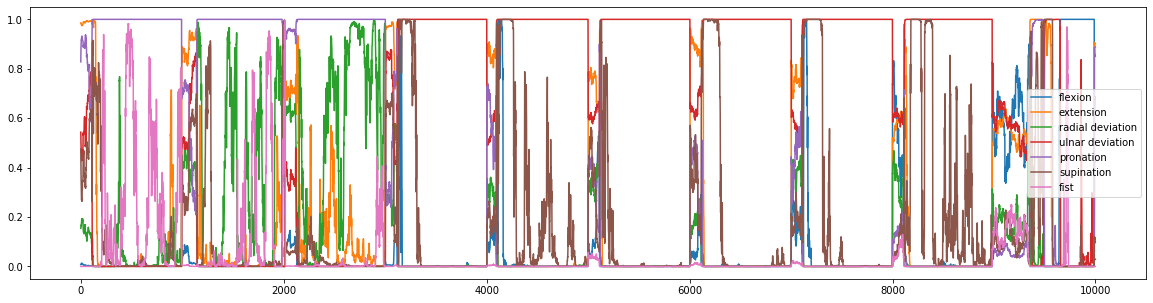

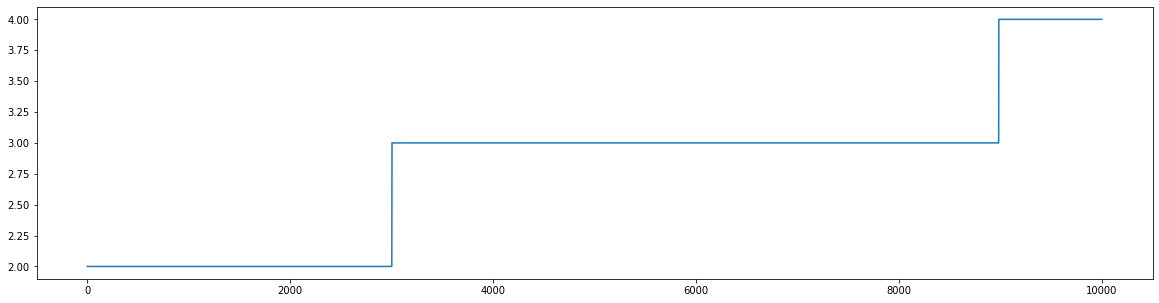

In [18]:
plt.figure()
plt.plot(predictions[15000:25000])
plt.legend(legend)
plt.figure()
plt.plot(test_labels[15000:25000])

In [19]:
training_analysis = model.predict(train)

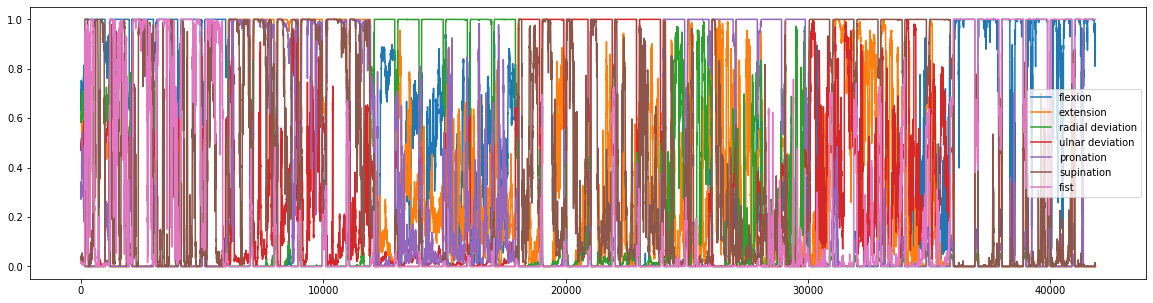

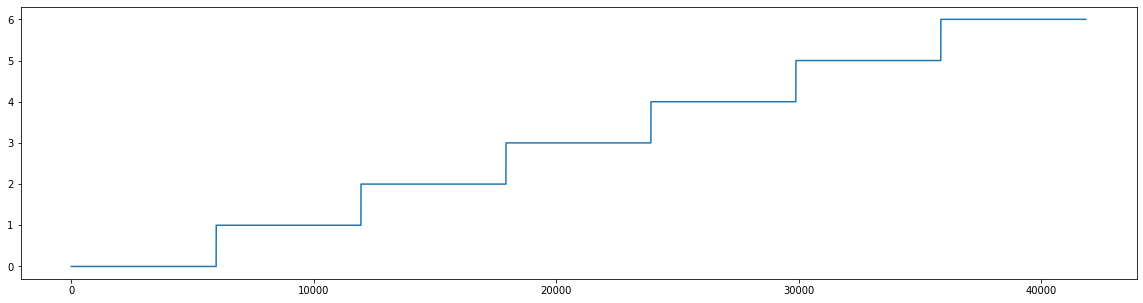

In [20]:
plt.figure()
plt.plot(training_analysis)
plt.legend(legend)
plt.figure()
plt.plot(train_labels)

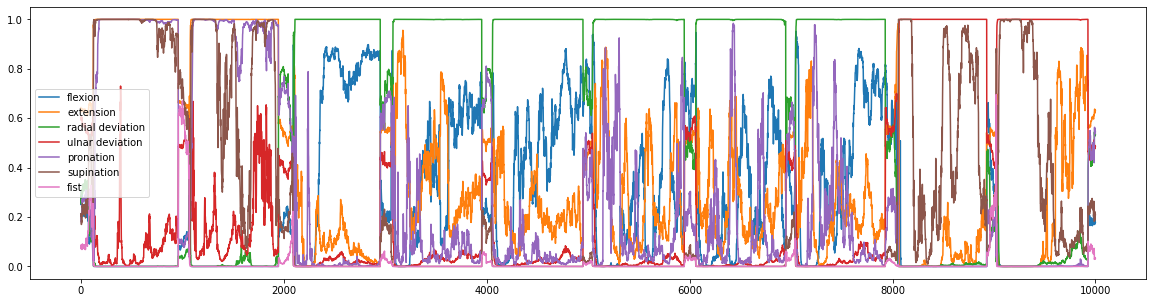

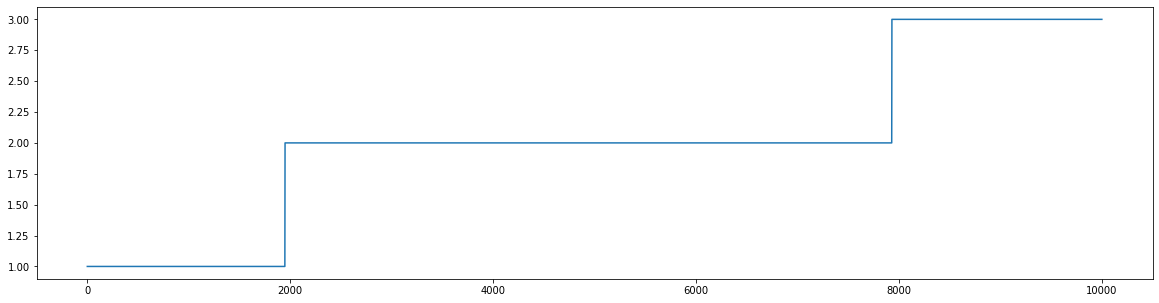

In [21]:
plt.figure()
plt.plot(training_analysis[10000:20000])
plt.legend(legend)
plt.figure()
plt.plot(train_labels[10000:20000])